# A1: Data Curation

The goal of this assignment is to construct, analyze, and publish a dataset of monthly traffic on English Wikipedia from January 1 2008 through August 30 2019. 

The purpose of the assignment is to demonstrate the best practices for open scientific research in designing and implementing a project, and making a project fully reproducible by others: from data collection to data analysis.

Step 0: Read about reproducibility

add some stuff here

,..


## Step 1: Data Acquisition

#### In order to measure Wikipedia traffic from 2008-2019, you will need to collect data from two different API endpoints, the Legacy Pagecounts API and the Pageviews API.

The Legacy Pagecounts API (documentation, endpoint) provides access to desktop and mobile traffic data from December 2007 through July 2016.
The Pageviews API (documentation, endpoint) provides access to desktop, mobile web, and mobile app traffic data from July 2015 through last month.

In [175]:
import json
import requests

In [187]:
# API ENDPOINTS
WIKIMEDIA_ENDPOINT = "https://wikimedia.org/api/rest_v1" 
PAGECOUNT_ENDPOINT =  WIKIMEDIA_ENDPOINT + "/metrics/legacy/pagecounts/aggregate/{project}/{access-site}/{granularity}/{start}/{end}"
PAGEVIEW_ENDPOINT = WIKIMEDIA_ENDPOINT + "/metrics/pageviews/aggregate/{project}/{access-site}/{agent}/{granularity}/{start}/{end}"

# API params
pagecounts_params = {
                    'project' : 'en.wikipedia.org',
                    'access-site' : '',
                    'granularity' : 'monthly',
                    'start' : '2008010100',
                    'end' : '2019100100'
                    }
pageviews_params = {
                    'project' : 'en.wikipedia.org',
                    'access-site' : '',
                    'agent': 'user',
                    'granularity' : 'monthly',
                    'start' : '2008010100',
                    'end' : '2019100100'
                    }


### Pagecount data

In [188]:
# Making API request to fetch data from wikimedia 

pagecounts_params["access-site"]="desktop-site"
pagecounts_desktop = requests.get(PAGECOUNT_ENDPOINT.format(**pagecounts_params))

pagecounts_params["access-site"]="mobile-site"
pagecounts_mobile =  requests.get(PAGECOUNT_ENDPOINT.format(**pagecounts_params))

# Write pagecounts desktop to file
with open('data/pagecounts_desktop-site_200801-201909.json', 'w') as outfile:
    json.dump(pagecounts_desktop.json(), outfile)
    
# Write pagecounts mobile to file    
with open('data/pagecounts_mobile-site_200801-201909.json', 'w') as outfile:
    json.dump(pagecounts_mobile.json(), outfile)    

### Pageview data

In [189]:
# Making API requests to 

pageviews_params["access-site"]="desktop"
pageviews_desktop = requests.get(PAGEVIEW_ENDPOINT.format(**pageviews_params))

pageviews_params["access-site"]="mobile-web"
pageviews_mobile_site = requests.get(PAGEVIEW_ENDPOINT.format(**pageviews_params))

pageviews_params["access-site"]="mobile-app"
pageviews_mobile_app = requests.get(PAGEVIEW_ENDPOINT.format(**pageviews_params))

# Write pageviews desktop to file
with open('data/pageviews_desktop-site_200801-201909.json', 'w') as outfile:
    json.dump(pageviews_desktop.json(), outfile)
    
# Write pageviews mobile site to file    
with open('data/pageviews_mobile-site_200801-201909.json', 'w') as outfile:
    json.dump(pageviews_mobile_site.json(), outfile) 

# Write pageviews mobile site to file    
with open('data/pageviews_mobile-app_200801-201909.json', 'w') as outfile:
    json.dump(pageviews_mobile_app.json(), outfile) 
        

## Step 2: Data Transformation

In [179]:
import pandas as pd
import json

#### Merging pagecount desktop and mobile 

In [190]:
# Read from json files
with open('data/pagecounts_desktop-site_200801-201909.json') as f:
    pagecount_desktop = pd.DataFrame.from_dict(json.load(f)["items"],orient='columns')
    
with open('data/pagecounts_mobile-site_200801-201909.json') as f:
    pagecount_mobile = pd.DataFrame.from_dict(json.load(f)["items"],orient='columns')

# Drop unwanted columnes    
pagecount_desktop = pagecount_desktop.drop(['access-site','granularity','project'], axis=1)
pagecount_mobile = pagecount_mobile.drop(['access-site','granularity','project'], axis=1)

# Join data frames
pagecounts = pd.merge(pagecount_desktop,pagecount_mobile, on='timestamp', how='outer')
pagecounts = pagecounts.fillna(0)

# Add mobile and desktop views for totall views
pagecounts["pagecount_all_views"] = pagecounts["count_x"] + pagecounts["count_y"]

# Rename columns
pagecounts = pagecounts.rename(index=str, 
                               columns={"count_x": "pagecount_desktop_views", 
                                        "count_y": "pagecount_mobile_views"})

### Adding pageview mobile site and mobile app

In [191]:
# Read from json files
with open('data/pageviews_desktop-site_200801-201909.json') as f:
    pageview_desktop = pd.DataFrame.from_dict(json.load(f)["items"],orient='columns')
    
with open('data/pageviews_mobile-site_200801-201909.json') as f:
    pageview_mobile_site = pd.DataFrame.from_dict(json.load(f)["items"],orient='columns')

with open('data/pageviews_mobile-app_200801-201909.json') as f:
    pageview_mobile_app = pd.DataFrame.from_dict(json.load(f)["items"],orient='columns')


pageview_mobile_site['views'] = pageview_mobile_site['views'] + pageview_mobile_app['views']   


,access,agent,granularity,project,timestamp,views
0,mobile-web,user,monthly,en.wikipedia,2015070100,3288755294
1,mobile-web,user,monthly,en.wikipedia,2015080100,3302333038
2,mobile-web,user,monthly,en.wikipedia,2015090100,3170203333
3,mobile-web,user,monthly,en.wikipedia,2015100100,3268499132
4,mobile-web,user,monthly,en.wikipedia,2015110100,3236601070
5,mobile-web,user,monthly,en.wikipedia,2015120100,3376275307
6,mobile-web,user,monthly,en.wikipedia,2016010100,3717836846
7,mobile-web,user,monthly,en.wikipedia,2016020100,3334862272
8,mobile-web,user,monthly,en.wikipedia,2016030100,3386684191
9,mobile-web,user,monthly,en.wikipedia,2016040100,3258764002


In [194]:
### Combine pageview mobile and desktop

pageview_desktop = pageview_desktop.drop(['access','granularity','project','agent'], axis=1)
pageview_mobile_site = pageview_mobile_site.drop(['access','granularity','project','agent'], axis=1)

pageviews = pd.merge(pageview_desktop,pageview_mobile_site, on='timestamp', how='outer')
pageviews = pageviews.fillna(0)
pageviews["pageview_all_views"] = pageviews["views_x"] + pageviews['views_y']
pageviews = pageviews.rename(index=str, 
                             columns={"views_x": "pageview_desktop_views", 
                                      "views_y": "pageview_mobile_views"})

In [195]:
pageviews
pagecounts
total_views = pd.merge(pagecounts,pageviews,on='timestamp',how='outer')
total_views = total_views.fillna(0)


In [196]:
total_views['year'] = total_views['timestamp'].str[0:4]
total_views['month'] = total_views['timestamp'].str[4:6]
total_views = total_views.drop(["timestamp"],axis=1)

In [197]:
total_views = total_views[['year','month',
                           'pagecount_all_views','pagecount_desktop_views','pagecount_mobile_views',
                           'pageview_all_views','pageview_desktop_views','pageview_mobile_views']]
total_views.to_csv('data/en-wikipedia_traffic_200712-201809.csv',index=False)

## Step 3: Visualization

In [198]:
import matplotlib.pyplot as plt


     year month  pagecount_all_views  pagecount_desktop_views  \
0    2008    01         4.930903e+09             4.930903e+09   
1    2008    02         4.818394e+09             4.818394e+09   
2    2008    03         4.955406e+09             4.955406e+09   
3    2008    04         5.159162e+09             5.159162e+09   
4    2008    05         5.584691e+09             5.584691e+09   
5    2008    06         5.712104e+09             5.712104e+09   
6    2008    07         5.306303e+09             5.306303e+09   
7    2008    08         5.140156e+09             5.140156e+09   
8    2008    09         5.479534e+09             5.479534e+09   
9    2008    10         5.679441e+09             5.679441e+09   
10   2008    11         5.415832e+09             5.415832e+09   
11   2008    12         5.211708e+09             5.211708e+09   
12   2009    01         5.802682e+09             5.802682e+09   
13   2009    02         5.547321e+09             5.547321e+09   
14   2009    03         6

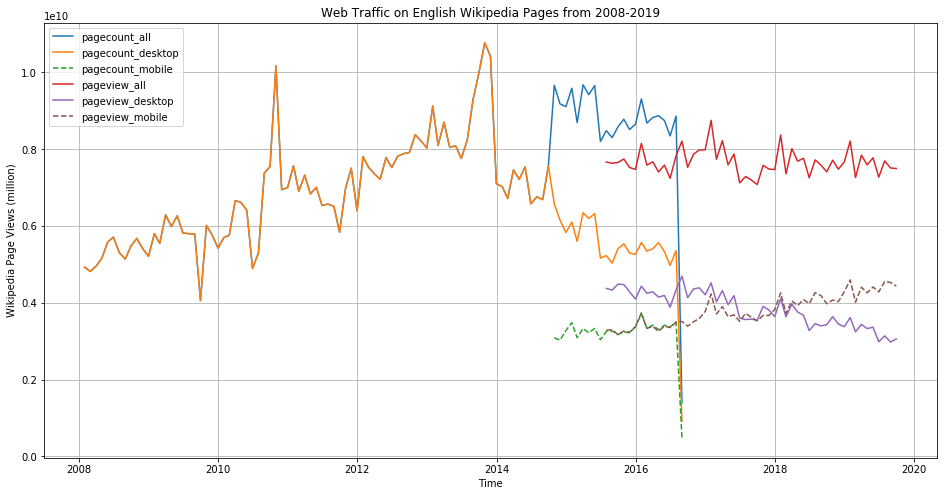

In [203]:
xAxis = pd.date_range('2008-01', '2019-10', freq='M')

total_views = total_views.replace(0,'nan')
print(total_views)
# Create a new figure with appropriate dimensions.
fig = plt.figure(figsize=(16, 8))

plt.plot(xAxis, total_views["pagecount_all_views"], label = "pagecount_all")
plt.plot(xAxis, total_views["pagecount_desktop_views"], label = "pagecount_desktop")
plt.plot(xAxis, total_views["pagecount_mobile_views"],linestyle = "--", label = "pagecount_mobile")

plt.plot(xAxis, total_views["pageview_all_views"],label = "pageview_all")
plt.plot(xAxis, total_views["pageview_desktop_views"], label = "pageview_desktop")
plt.plot(xAxis, total_views["pageview_mobile_views"], linestyle = "--", label = "pageview_mobile")


plt.legend(loc=2)
plt.xlabel("Time")
plt.ylabel("Wikipedia Page Views (million)")
plt.title("Web Traffic on English Wikipedia Pages from 2008-2019")

# Show grid
plt.grid(True)

# Display plot
plt.show()

